<div style="background-color:#783465 ; text-align:center; vertical-align: middle; padding:40px 0; margin-top:30px">
<h1 style="color:white"> Data Analyse</h1>
    
<h4 style="color:black"> Datalab V: Julia Boschman, Isa Dijkstra, Daan Eising, Rogier Gernaat </h4>

<a name='start'></a>

## Table of contents

1. [H1: Inleiding](#1.0)
    - [&sect;1.1: Uitleg van het Notebook](#1.1)
    - [&sect;1.2: Imports](#1.2)
2. [H2: Inlezen van bestanden](#2.0)
    - [&sect;2.1: Verschillende scholen in bestand](#2.1)
    - [&sect;2.2: Inlezen van bestanden](#2.2)
    - [&sect;2.3: Display van de inhoud van de bestanden](#2.3)
    - [&sect;2.4: Mooiere Display](#2.4)
3. [H3: Berekenen en laten zien van de eerste statistieken](#3.0)
    - [&sect;3.1: Berekenen van statistieken](#3.1)
    - [&sect;3.2: Weergave van de statistieken](#3.2)
    - [&sect;3.3: Gemiddelde woord lengte per school](#3.3)
    - [&sect;3.4: de Vocabulaire Diversiteit](#3.4)
    - [&sect;3.5: Totaal aantal woorden visualiseren](#3.5)
    - [&sect;3.6: Meest voorkomende woorden per school](#3.6)
4. [H4: Verbeteren van de data](#4.0)
    - [&sect;4.1: Inladen van Nederlandse stopwoorden](#4.1)
    - [&sect;4.2: Nederlandse stopwoorden verwijderen](#4.2)
    - [&sect;4.3: Weergeven van meest voorkomende woorden na verwijdering van stopwoorden](#4.3)
    - [&sect;4.4: Stemmen van de woorden](#4.4)
    - [&sect;4.5: Laatste ronde tekst opschonen](#4.5)
    - [&sect;4.6: Meest voorkomende woorden per school na laatste opschoning](#4.6)

[Back to the top](#start)
<a name='1.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H1: Inleiding</strong></h2>
</div>

<a name='1.1'></a>
<h3>&sect;1.1: Uitleg van het Notebook </h3>

<a name='1.2'></a>
<h3>&sect;1.2: Imports</h3>

In [1]:
#!pip install PyPDF2
#!pip install pdfplumber
#!pip install pdf2image
#!pip install pytesseract
#!pip install fitz
#!pip install frontend
#!pip install pdf2image pytesseract

In [1]:
import PyPDF2
import re
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem.snowball import SnowballStemmer
import logging
from collections import Counter
from collections import defaultdict
import pdfplumber
from pdf2image import convert_from_path
import pytesseract

C:\Users\bosch\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\bosch\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


[Back to the top](#start)
<a name='2.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H2: Inlezen van de bestanden</strong></h2>
</div>

<a name='2.1'></a>
<h3>&sect;2.1: Verschillende scholen in bestand</h3>

In [26]:
school_pages = {
    "Atlas College, Hoorn": (6, 13),
    "Baudartius College, Zutphen": (21, 37),
    "College Vos, Vlaardingen": (51, 64),
    "Liemers College, Zevenaar": (76, 97),
    "Montaigne Lyceum, Den Haag": (101, 110),
    "Nassau College, Zoetermeer": (115, 124),
    "ORS Lek en Linge": (133, 140),
    "SG Dalton, Voorburg": (145, 154),
    "Schoonhovens College, Schoonhoven": (178, 189),
    "Stedelijk College, Eindhoven": (193, 205)
}

<a name='2.2'></a>
<h3>&sect;2.2: Inlezen van bestanden</h3>

In [27]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

def ocr_text_from_pdf(pdf_path, school_pages):
    all_texts = {}
    
    for school, (start_page, end_page) in school_pages.items():
        print(f"OCR: {school} (pagina’s {start_page}-{end_page}) uit {pdf_path}")
        
        images = convert_from_path(pdf_path, dpi=300, first_page=start_page, last_page=end_page,
                                   poppler_path=r'C:\Program Files\poppler-24.08.0\Library\bin')
        
        full_text = ""
        for img in images:
            text = pytesseract.image_to_string(img, lang='nld')
            full_text += text + "\n"
        
        all_texts[school] = full_text.strip()
    
    return all_texts

pdf_path = "Plannen voor leermiddelenbeleid van ruim 10 scholen.pdf"
school_sections = ocr_text_from_pdf(pdf_path, school_pages)

OCR: Atlas College, Hoorn (pagina’s 6-13) uit Plannen voor leermiddelenbeleid van ruim 10 scholen.pdf
OCR: Baudartius College, Zutphen (pagina’s 21-37) uit Plannen voor leermiddelenbeleid van ruim 10 scholen.pdf
OCR: College Vos, Vlaardingen (pagina’s 51-64) uit Plannen voor leermiddelenbeleid van ruim 10 scholen.pdf
OCR: Liemers College, Zevenaar (pagina’s 76-97) uit Plannen voor leermiddelenbeleid van ruim 10 scholen.pdf
OCR: Montaigne Lyceum, Den Haag (pagina’s 101-110) uit Plannen voor leermiddelenbeleid van ruim 10 scholen.pdf
OCR: Nassau College, Zoetermeer (pagina’s 115-124) uit Plannen voor leermiddelenbeleid van ruim 10 scholen.pdf
OCR: ORS Lek en Linge (pagina’s 133-140) uit Plannen voor leermiddelenbeleid van ruim 10 scholen.pdf
OCR: SG Dalton, Voorburg (pagina’s 145-154) uit Plannen voor leermiddelenbeleid van ruim 10 scholen.pdf
OCR: Schoonhovens College, Schoonhoven (pagina’s 178-189) uit Plannen voor leermiddelenbeleid van ruim 10 scholen.pdf
OCR: Stedelijk College, Eind

<a name='2.3'></a>
<h3>&sect;2.3: Display van de inhoud van de bestanden</h3>

In [52]:
print(school_sections)

{'Atlas College, Hoorn': "Inleiding\n\n1.1 Aanleiding en doel\n\nHet Atlas College bestaat uit vijf scholen voor voortgezet\nonderwijs: Copernicus Scholengemeenschap (vmbo-t,\n\nhavo, vwo), De Dijk (vmbo, havo, vwo), OSG West-Friesland,\n(vmbo-t, havo, vwo), Titaan (vmbo) en Triade (vmbo, havo,\nvwo). Op hoofdthema’s trekken de vijf locaties gezamenlijk op,\nom van elkaar te leren en om de schaalgrootte te benutten.\nLeermiddelenbeleid is zo’n hoofdthema.\n\nDe belangrijkste aanleiding voor het opstellen van een\nleermiddelenbeleidsplan voor de vijf Atlasscholen zijn de\nvernieuwde ambities van het Atlas College. Leermiddelen\nhebben een belangrijke rol bij het vervullen van die\nambities. Daarnaast maken de beschikbaarheid van\n\nsteeds meer leermiddelen (via internet) en de nieuwe\nfinancieringssystematiek voor leermiddelen het ontwikkelen\nvan leermiddelenbeleid zinvol.\n\nDe vraag waar dit leermiddelenbeleidsplan een antwoord op\nwil geven is: Welke leermiddelen hebben we nodig om 

<a name='2.4'></a>
<h3>&sect;2.4: Mooiere Display</h3>

In [28]:
for school, text in school_sections.items():
    print(f"\n--- {school} ---\n")
    print(text)


--- Atlas College, Hoorn ---

Inleiding

1.1 Aanleiding en doel

Het Atlas College bestaat uit vijf scholen voor voortgezet
onderwijs: Copernicus Scholengemeenschap (vmbo-t,

havo, vwo), De Dijk (vmbo, havo, vwo), OSG West-Friesland,
(vmbo-t, havo, vwo), Titaan (vmbo) en Triade (vmbo, havo,
vwo). Op hoofdthema’s trekken de vijf locaties gezamenlijk op,
om van elkaar te leren en om de schaalgrootte te benutten.
Leermiddelenbeleid is zo’n hoofdthema.

De belangrijkste aanleiding voor het opstellen van een
leermiddelenbeleidsplan voor de vijf Atlasscholen zijn de
vernieuwde ambities van het Atlas College. Leermiddelen
hebben een belangrijke rol bij het vervullen van die
ambities. Daarnaast maken de beschikbaarheid van

steeds meer leermiddelen (via internet) en de nieuwe
financieringssystematiek voor leermiddelen het ontwikkelen
van leermiddelenbeleid zinvol.

De vraag waar dit leermiddelenbeleidsplan een antwoord op
wil geven is: Welke leermiddelen hebben we nodig om onze
onderwijskundi

[Back to the top](#start)
<a name='3.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H3: Berekenen en laten zien van de eerste statistieken</strong></h2>
</div>

<a name='3.1'></a>
<h3>&sect;3.1: Berekenen van Statistieken</h3>

In [31]:
stats = []
for school, text in school_sections.items():
    tokens = word_tokenize(text)
    word_lengths = [len(word) for word in tokens]
    avg_word_length = sum(word_lengths) / len(word_lengths)
    vocab_diversity = len(set(tokens)) / len(tokens)
    stats.append({
        'School': school,
        'Average Word Length': avg_word_length,
        'Total Words': len(tokens),
        'Vocabulary Diversity': vocab_diversity
    })

df_stats = pd.DataFrame(stats)

<a name='3.2'></a>
<h3>&sect;3.2: Weergaven van de statistieken</h3>

In [32]:
df_stats

,School,Average Word Length,Total Words,Vocabulary Diversity
0,"Atlas College, Hoorn",5.090000,4600,0.245870
1,"Baudartius College, Zutphen",5.064584,5729,0.285914
2,"College Vos, Vlaardingen",4.881672,5096,0.248234
3,"Liemers College, Zevenaar",5.471995,6731,0.206359
4,"Montaigne Lyceum, Den Haag",5.286463,3435,0.291994
5,"Nassau College, Zoetermeer",5.095994,2646,0.306878
6,ORS Lek en Linge,4.943484,4282,0.244045
7,"SG Dalton, Voorburg",5.030967,3972,0.273666
8,"Schoonhovens College, Schoonhoven",5.526814,4121,0.276389
9,"Stedelijk College, Eindhoven",5.079900,5995,0.297248


<a name='3.3'></a>
<h3>&sect;3.3: Gemiddelde woord lengte per school</h3>

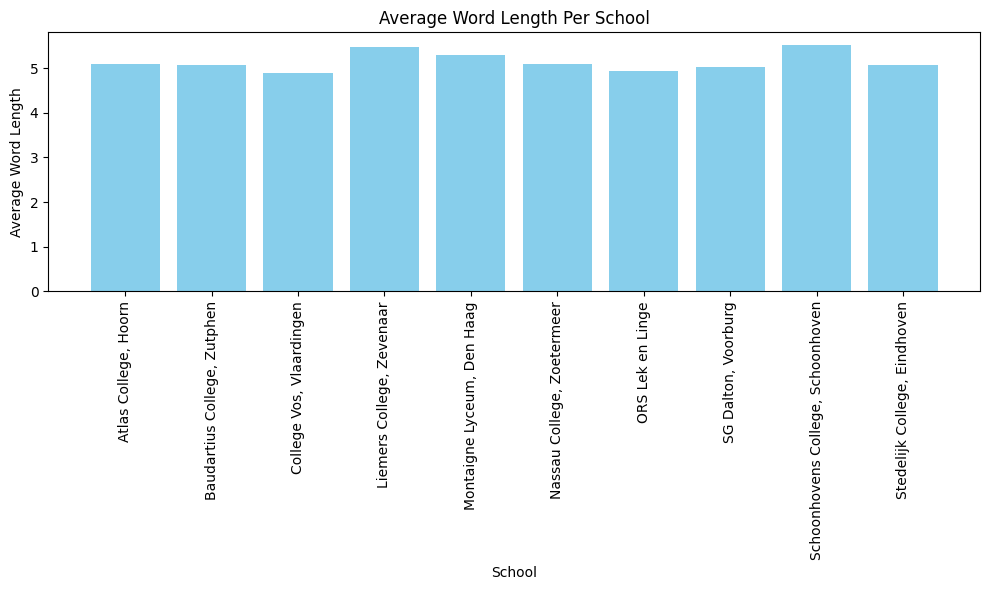

In [33]:
# Gemiddelde Woord lengte per school
plt.figure(figsize=(10, 6))
plt.bar(df_stats['School'], df_stats['Average Word Length'], color='skyblue')
plt.xlabel('School')
plt.ylabel('Average Word Length')
plt.title('Average Word Length Per School')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<a name='3.4'></a>
<h3>&sect;3.4: de Vocabulaire Diversiteit</h3>

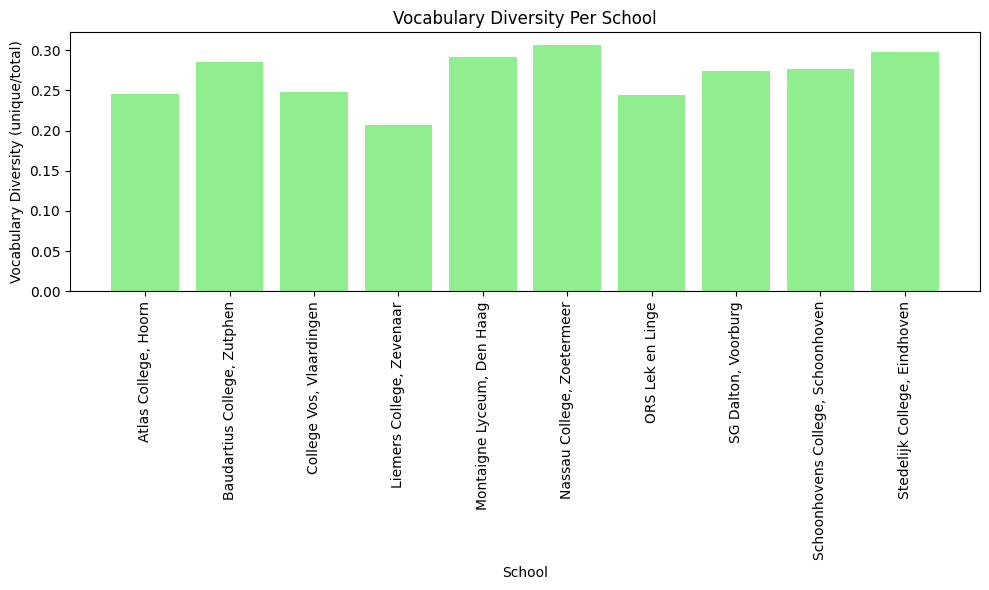

In [34]:
# de Vocabulaire Diversiteit
plt.figure(figsize=(10, 6))
plt.bar(df_stats['School'], df_stats['Vocabulary Diversity'], color='lightgreen')
plt.xlabel('School')
plt.ylabel('Vocabulary Diversity (unique/total)')
plt.title('Vocabulary Diversity Per School')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<a name='3.5'></a>
<h3>&sect;3.5: Totaal aantal woorden visualiseren</h3>

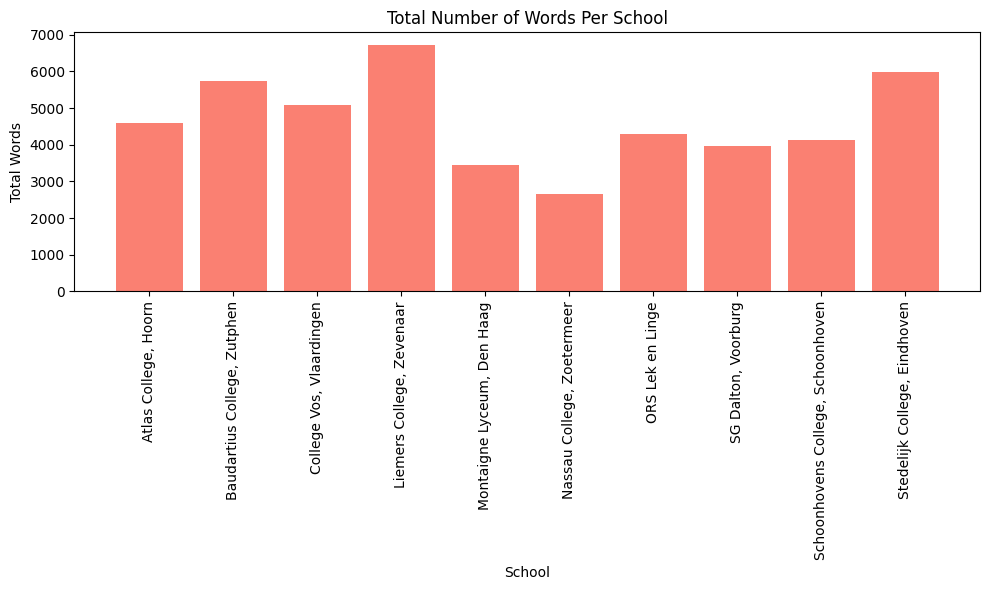

In [35]:
# Totaal aantal woorden visualiseren
plt.figure(figsize=(10, 6))
plt.bar(df_stats['School'], df_stats['Total Words'], color='salmon')
plt.xlabel('School')
plt.ylabel('Total Words')
plt.title('Total Number of Words Per School')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In het originele document bevatte de school SG De Rietlanden, Lelystad veel data, maar dat is tijdens het inlezen weg gevallen. Dit komt, omdat de tekst bijna volledig werd ingelezen als unicodes waar geen nuttige informatie uit gehaald kan worden. Het is belangrijk om uit te zoeken of ons model het bestand wel volledig kan inlezen, omdat het anders beter is om zulke bestanden te verwijderen. We willen geen bestanden meegeven die alleen maar voor ruis gaan zorgen tijdens het trainen of gebruiken van het model.

<a name='3.6'></a>
<h3>&sect;3.6: Meest voorkomende woorden per school</h3>

In [44]:
common_words = {}
for school, text in school_sections.items():
    tokens = word_tokenize(text)
    word_freq = Counter(tokens)
    common_words[school] = word_freq.most_common(5)

for school, words in common_words.items():
    print(f"School: {school}\nCommon Words: {words}\n")

School: Atlas College, Hoorn
Common Words: [('.', 205), ('de', 155), ('en', 150), (',', 148), ('van', 132)]

School: Baudartius College, Zutphen
Common Words: [('.', 284), ('de', 231), ('van', 160), (',', 159), ('en', 146)]

School: College Vos, Vlaardingen
Common Words: [('de', 293), ('.', 259), ('van', 164), (',', 137), ('en', 134)]

School: Liemers College, Zevenaar
Common Words: [('.', 368), ('de', 335), ('van', 257), ('en', 219), ('het', 166)]

School: Montaigne Lyceum, Den Haag
Common Words: [('de', 169), ('.', 169), ('van', 146), ('het', 110), ('en', 91)]

School: Nassau College, Zoetermeer
Common Words: [('de', 120), ('.', 116), ('van', 95), (',', 91), ('het', 72)]

School: ORS Lek en Linge
Common Words: [('de', 261), ('.', 196), ('van', 164), ('het', 121), ('en', 116)]

School: SG Dalton, Voorburg
Common Words: [('de', 247), ('.', 142), ('van', 140), ('het', 130), ('en', 98)]

School: Schoonhovens College, Schoonhoven
Common Words: [('de', 264), ('.', 167), ('van', 159), ('en'

[Back to the top](#start)
<a name='4.0'></a>

<div style="background-color:#783465; text-align:center; vertical-align:middle; padding:10px 0; margin-top:5px; margin-bottom:5px">
        <h2 style="color:white"><strong>H4: Verbeteren van de data</strong></h2>
</div>

<a name='4.1'></a>
<h3>&sect;4.1: Inladen van Nederlandse stopwoorden</h3>

In [45]:
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = file.read().splitlines()
    return set(stopwords)

stop_words = load_stopwords('dutch_stopwords.txt')

<a name='4.2'></a>
<h3>&sect;4.2: Nederlandse stopwoorden verwijderen</h3>

In [46]:
def remove_stopwords(text, stopwords):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stopwords and word.isalnum()]
    return ' '.join(filtered_words)

school_data_no_stopwords = {school: remove_stopwords(text, stop_words) for school, text in school_sections.items()}

<a name='4.3'></a>
<h3>&sect;4.3: Weergeven van meest voorkomende woorden na verwijdering van stopwoorden</h3>

In [47]:
def get_most_common_words(text, num_words=10):
    tokens = word_tokenize(text)
    word_freq = Counter(tokens)
    return word_freq.most_common(num_words)

common_words_no_stopwords = {school: get_most_common_words(text) for school, text in school_data_no_stopwords.items()}

In [48]:
common_words_no_stopwords

{'Atlas College, Hoorn': [('leermiddelen', 69),
  ('leerlingen', 23),
  ('mm', 20),
  ('nieuwe', 18),
  ('geheel', 18),
  ('criterialijst', 17),
  ('ict', 15),
  ('methode', 15),
  ('criteria', 14),
  ('Atlas', 13)],
 'Baudartius College, Zutphen': [('leermiddelen', 44),
  ('leerlingen', 29),
  ('school', 22),
  ('gaan', 20),
  ('budget', 16),
  ('Toelichting', 16),
  ('1', 15),
  ('vakken', 15),
  ('leermiddelenbeleid', 14),
  ('geven', 14)],
 'College Vos, Vlaardingen': [('leerlingen', 43),
  ('leermiddelen', 39),
  ('docenten', 21),
  ('digitale', 18),
  ('gebruik', 17),
  ('materiaal', 17),
  ('jaar', 16),
  ('werkboeken', 15),
  ('vakgroepen', 14),
  ('goed', 14)],
 'Liemers College, Zevenaar': [('leermiddelen', 106),
  ('s', 56),
  ('leerlingen', 40),
  ('gebruik', 34),
  ('TeleTop', 31),
  ('docenten', 28),
  ('Toelichting', 22),
  ('Gevolgen', 22),
  ('kosten', 22),
  ('Evaluatie', 20)],
 'Montaigne Lyceum, Den Haag': [('materiaal', 43),
  ('school', 26),
  ('ontwikkelen', 17),

Er komen veel woorden naar boven die op elkaar lijken, denk bijvoorbeeld aan leerling en leerlingen. Het is handig om een vorm van stemming of lemmatization toe te passen, omdat zulk soort woorden de zelfde betekenis hebben.

Daarnaast zien we ook veel enkele letters terug in de meest voorkomende woorden. Deze hebben geen betekenis en willen we ook verwijderen.

Als laatste komen er veel enkele cijfers terug die op zich zelf geen betekenis hebben. Belangrijke cijfers als bedragen willen we wil behouden, maar deze worden aangegeven met een euro teken. Daarom willen we de cijfers uit de teksten halen die alleen staan.

<a name='4.4'></a>
<h3>&sect;4.4: Stemmen van de woorden</h3>

In [49]:
stemmer = SnowballStemmer("dutch")

def stem_words(words, stemmer):
    return [stemmer.stem(word) for word in words]

<a name='4.5'></a>
<h3>&sect;4.5: Laatste ronde tekst opschonen</h3>

In [50]:
def process_text(text, stopwords, stemmer):
    words = word_tokenize(text)
    # Filter woorden: verwijder stopwoorden, alfanumerieke woorden, en woorden met één letter, en losse cijfers
    filtered_words = [word for word in words if word.lower() not in stopwords and len(word) > 1 and word.isalnum() and not word.isdigit()]
    # Pas stemming toe
    stemmed_words = stem_words(filtered_words, stemmer)
    return ' '.join(stemmed_words)

processed_school_data = {school: process_text(text, stop_words, stemmer) for school, text in school_sections.items()}

<a name='4.6'></a>
<h3>&sect;4.6: Meest voorkomende woorden per school na laatste opschoning</h3>

In [51]:
common_words_processed = {school: get_most_common_words(text) for school, text in processed_school_data.items()}

for school, words in common_words_processed.items():
    print(f"School: {school}\nTop Words: {words}\n")

School: Atlas College, Hoorn
Top Words: [('leermiddel', 86), ('leerling', 33), ('nieuw', 20), ('mm', 20), ('criteria', 19), ('docent', 19), ('gehel', 19), ('criterialijst', 18), ('digital', 17), ('method', 17)]

School: Baudartius College, Zutphen
Top Words: [('leermiddel', 53), ('leerling', 41), ('schol', 29), ('vak', 27), ('docent', 26), ('gan', 20), ('nieuw', 19), ('budget', 18), ('toelicht', 16), ('leermiddelenbeleid', 15)]

School: College Vos, Vlaardingen
Top Words: [('leerling', 51), ('leermiddel', 40), ('docent', 26), ('gesprek', 25), ('digital', 25), ('werkboek', 25), ('jar', 23), ('vakgroep', 22), ('gebruik', 21), ('goed', 20)]

School: Liemers College, Zevenaar
Top Words: [('leermiddel', 115), ('leerling', 59), ('docent', 53), ('project', 45), ('gebruik', 39), ('teletop', 33), ('gevolg', 32), ('ontwikkel', 28), ('digital', 28), ('uitsprak', 25)]

School: Montaigne Lyceum, Den Haag
Top Words: [('materiaal', 47), ('schol', 29), ('ontwikkel', 24), ('uiter', 17), ('montaign', 16